In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# Find the latest version of spark 3.x  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.5.0'
spark_version = 'spark-3.5.0'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [624 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,010 kB]
Get:13 http://security.ubuntu.com/u

In [3]:
# Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder.appName("Salary").getOrCreate()

**SPARK SQL**

In [4]:
# Read CSV file into a Spark DataFrame
file_path = "/content/drive/MyDrive/salary.csv"
spark_df = spark.read.csv(file_path, header=True, inferSchema=True)

#Show the salary df
spark_df.show()

+---+--------------------+--------------------+------+--------------------+-------------+-------+--------------------+--------------------+--------------------+------+-----------------+----------+----------+----------+---------+---+---------+----+-----+---+-----+
| ID|           Job_Title|     Salary_Estimate|Rating|        Company_Name|         Size|Founded|   Type_of_Ownership|              Sector|             Revenue|hourly|employer_provided|min_salary|max_salary|avg_salary|job_state|age|python_yn|R_yn|spark|aws|excel|
+---+--------------------+--------------------+------+--------------------+-------------+-------+--------------------+--------------------+--------------------+------+-----------------+----------+----------+----------+---------+---+---------+----+-----+---+-----+
|  0|      Data Scientist|$53K-$91K (Glassd...|   3.8|   Tecolote Research|  501 to 1000|   1973|   Company - Private| Aerospace & Defense|$50 to $100 milli...|     0|                0|        53|        91| 

In [5]:
spark_df.createOrReplaceTempView('salary')

In [6]:
spark.sql("""
SELECT
Sector,
ROUND(Median(avg_salary),2) AS Median_Salary_Sector
FROM
salary
GROUP BY Sector
""").show()

+--------------------+--------------------+
|              Sector|Median_Salary_Sector|
+--------------------+--------------------+
|         Health Care|                81.0|
|           Education|               106.5|
|           Insurance|               100.0|
|Information Techn...|              104.25|
|          Government|                81.5|
|Oil, Gas, Energy ...|                76.5|
|             Finance|                87.0|
|         Real Estate|                96.0|
|          Non-Profit|                52.5|
|               Media|               113.0|
|               Other|               97.75|
|Biotech & Pharmac...|               112.0|
|    Travel & Tourism|                65.0|
| Aerospace & Defense|              100.75|
|   Business Services|                92.0|
|              Retail|               92.75|
|       Manufacturing|                82.0|
+--------------------+--------------------+



In [7]:
spark.sql("""
SELECT
Revenue,
ROUND(Median(avg_salary),2) AS Median_Salary_Ownership
FROM
salary
GROUP BY Revenue
""").show()

+--------------------+-----------------------+
|             Revenue|Median_Salary_Ownership|
+--------------------+-----------------------+
|$50 to $100 milli...|                   90.5|
|$100 to $500 mill...|                  87.75|
|$10 to $25 millio...|                   96.5|
|  $10+ billion (USD)|                  105.0|
|$1 to $5 million ...|                  118.0|
|$500 million to $...|                  86.75|
|Unknown / Non-App...|                  103.5|
|$25 to $50 millio...|                   80.5|
|$5 to $10 billion...|                   93.5|
|$5 to $10 million...|                  121.0|
|$2 to $5 billion ...|                   90.0|
|$1 to $2 billion ...|                   97.5|
|Less than $1 mill...|                  113.5|
+--------------------+-----------------------+



Creating a pandas data frame from SQL

In [8]:
# Run a Spark SQL query and convert the result to a Pandas DataFrame
query_result = spark.sql("SELECT * FROM salary")
salary_df = query_result.toPandas()

# Display the Pandas DataFrame
salary_df.head()


,ID,Job_Title,Salary_Estimate,Rating,Company_Name,Size,Founded,Type_of_Ownership,Sector,Revenue,...,min_salary,max_salary,avg_salary,job_state,age,python_yn,R_yn,spark,aws,excel
0,0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research,501 to 1000,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD),...,53,91,72.0,NM,47,1,0,0,0,1
1,1,Other Data related Job,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System,10000+,1984,Other Organization,Health Care,$2 to $5 billion (USD),...,63,112,87.5,MD,36,1,0,0,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4,501 to 1000,2010,Company - Private,Business Services,$100 to $500 million (USD),...,80,90,85.0,FL,10,1,0,1,0,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL,1001 to 5000,1965,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),...,56,97,76.5,WA,55,1,0,0,0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions,51 to 200,1998,Company - Private,Business Services,Unknown / Non-Applicable,...,86,143,114.5,NY,22,1,0,0,0,1


Preprocessing

In [9]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [10]:
# Determine the data type of each column.
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 457 non-null    int32  
 1   Job_Title          457 non-null    object 
 2   Salary_Estimate    457 non-null    object 
 3   Rating             457 non-null    float64
 4   Company_Name       457 non-null    object 
 5   Size               457 non-null    object 
 6   Founded            457 non-null    int32  
 7   Type_of_Ownership  457 non-null    object 
 8   Sector             457 non-null    object 
 9   Revenue            457 non-null    object 
 10  hourly             457 non-null    int32  
 11  employer_provided  457 non-null    int32  
 12  min_salary         457 non-null    int32  
 13  max_salary         457 non-null    int32  
 14  avg_salary         457 non-null    float64
 15  job_state          457 non-null    object 
 16  age                457 non

In [11]:
# Determine the number of unique values in each column.
salary_df.nunique()

ID                   457
Job_Title             21
Salary_Estimate      409
Rating                31
Company_Name         335
Size                   7
Founded              102
Type_of_Ownership      9
Sector                17
Revenue               13
hourly                 2
employer_provided      2
min_salary           118
max_salary           162
avg_salary           224
job_state             38
age                  102
python_yn              2
R_yn                   2
spark                  2
aws                    2
excel                  2
dtype: int64

In [12]:
#Summary Statistics
salary_df['avg_salary'].describe()

count    457.000000
mean     100.735230
std       37.418829
min       13.500000
25%       75.500000
50%       97.000000
75%      121.000000
max      254.000000
Name: avg_salary, dtype: float64

In [13]:
# Take out only the necessary columns
salary_df1 = salary_df[['Company_Name','Job_Title','Type_of_Ownership','Sector','Size','python_yn','R_yn','spark','aws','excel','Rating']]
salary_df1.head()

,Company_Name,Job_Title,Type_of_Ownership,Sector,Size,python_yn,R_yn,spark,aws,excel,Rating
0,Tecolote Research,Data Scientist,Company - Private,Aerospace & Defense,501 to 1000,1,0,0,0,1,3.8
1,University of Maryland Medical System,Other Data related Job,Other Organization,Health Care,10000+,1,0,0,0,0,3.4
2,KnowBe4,Data Scientist,Company - Private,Business Services,501 to 1000,1,0,1,0,1,4.8
3,PNNL,Data Scientist,Government,"Oil, Gas, Energy & Utilities",1001 to 5000,1,0,0,0,0,3.8
4,Affinity Solutions,Data Scientist,Company - Private,Business Services,51 to 200,1,0,0,0,1,2.9


In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
#salary_dummies = pd.get_dummies(salary_df[['Job_Title','Type_of_Ownership','Sector','Size','Revenue']])
#other_df = salary_df[['Rating','python_yn','R_yn','spark','aws','excel']]
salary_dummies = pd.get_dummies(salary_df1[['Company_Name','Job_Title','Type_of_Ownership','Sector','Size']])
other_df = salary_df1[['python_yn','R_yn','spark','aws','excel']]
salary_df2 = pd.concat([other_df,salary_dummies],axis = 1)
salary_df2.head()

,python_yn,R_yn,spark,aws,excel,"Company_Name_1-800-FLOWERS.COM, Inc.",Company_Name_1904labs,Company_Name_23andMe,Company_Name_7Park Data,Company_Name_AVANADE,...,Sector_Real Estate,Sector_Retail,Sector_Travel & Tourism,Size_1 to 50,Size_10000+,Size_1001 to 5000,Size_201 to 500,Size_5001 to 10000,Size_501 to 1000,Size_51 to 200
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# Split our preprocessed data into our features and target arrays
X = salary_df2.values
y = salary_df['avg_salary'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

**Random Forest**

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [18]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators= 150, random_state=42)

In [19]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [20]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [21]:
# Calculate mse and r2
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Squared Error: 1132.4634701623736
Root Mean Squared Error: 33.65209458803974
Mean Absolute Percentage Error: 33.109951301919%


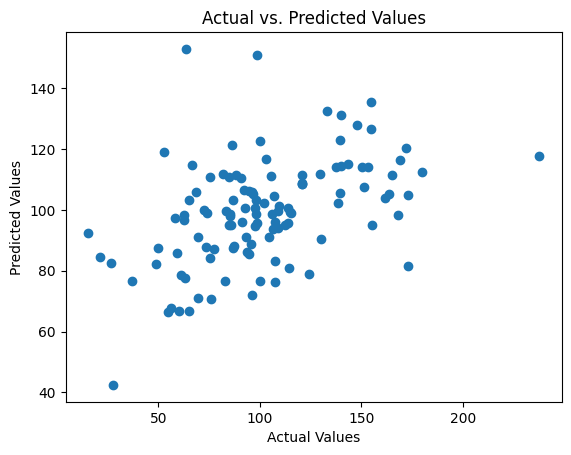

In [22]:
#Plot a scatter plot
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

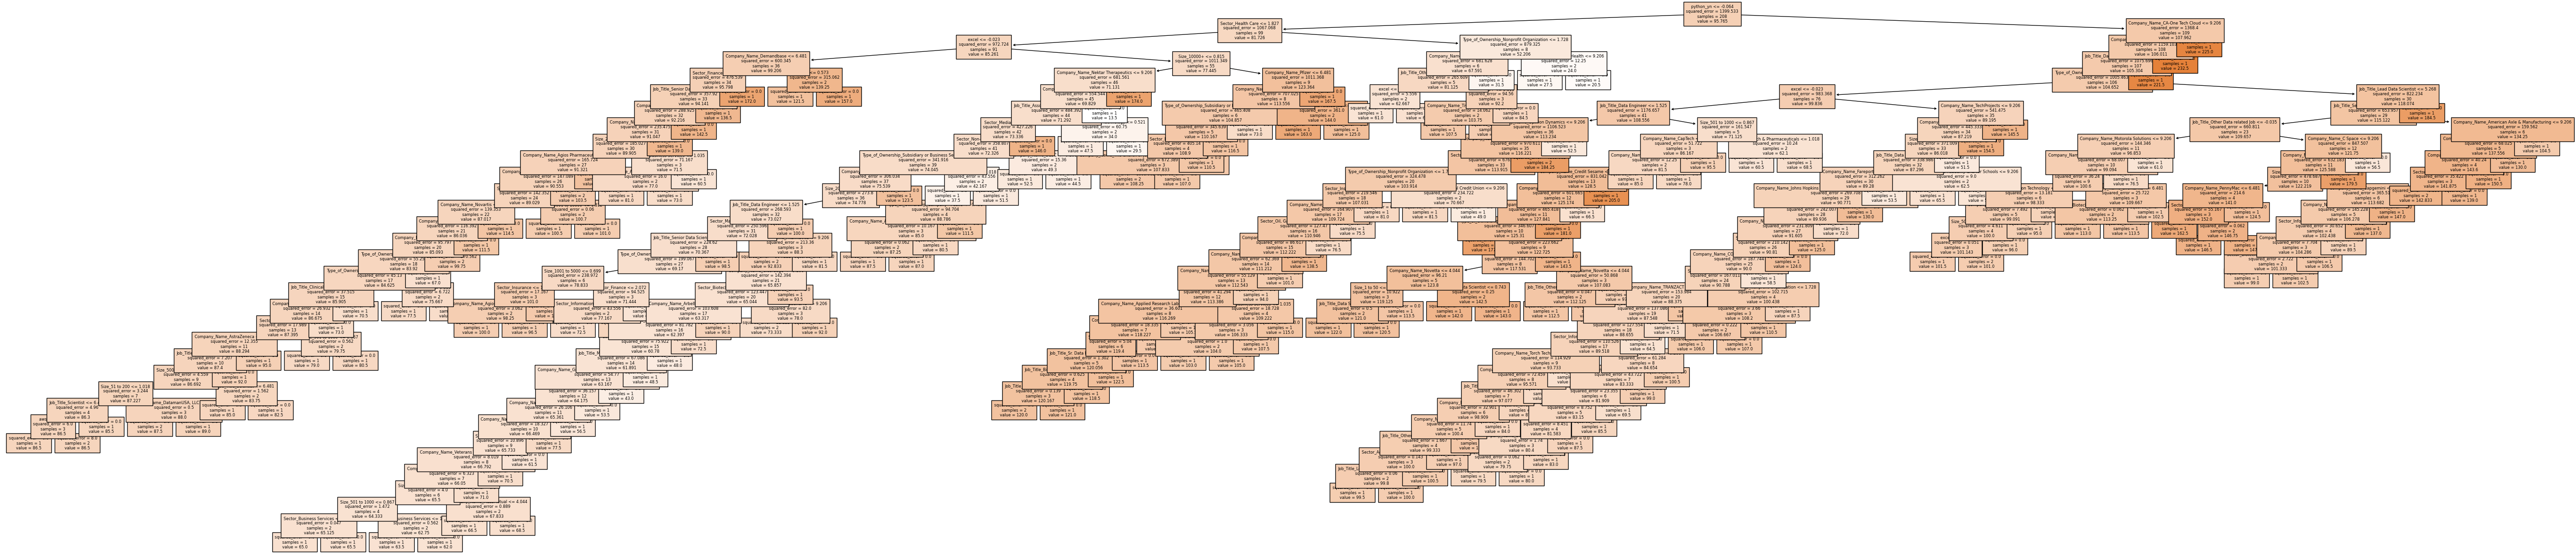

In [28]:
from sklearn import tree
fig = plt.figure(figsize=(70,15))
rf = tree.plot_tree(rf_model.estimators_[1],
                   feature_names=salary_df2.columns,
                   filled=True,fontsize=6)

Feature Importance

In [27]:
#Calculate feature importance
importances = rf_model.feature_importances_
# Sort the features by their importance
sorted(zip(rf_model.feature_importances_, salary_df1.columns), reverse=True)

[(0.06814855291175034, 'Company_Name'),
 (0.0357531249801637, 'Size'),
 (0.022835360446040374, 'Sector'),
 (0.01594531378156134, 'Type_of_Ownership'),
 (0.0025263657108373925, 'R_yn'),
 (0.0003719824626448988, 'python_yn'),
 (0.0003080591357997006, 'spark'),
 (0.00011605686461101934, 'Job_Title'),
 (2.4543611213106368e-05, 'excel'),
 (1.8788418604367688e-05, 'Rating'),
 (0.0, 'aws')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

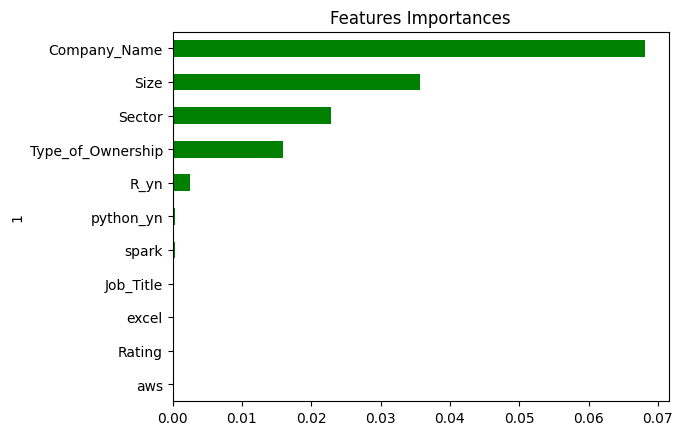

In [26]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, salary_df1.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Features Importances', legend=False)

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Assuming X and y are your features and target variable, respectively
# Define the Random Forest Regressor
rf = RandomForestRegressor()

# Define hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Randomized search cross-validation
n_iter_search = 20
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best Parameters: ", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the model as needed
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R squared: {r2}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameters:  {'bootstrap': True, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 145}
Mean Squared Error: 1123.893330597165
R squared: 0.2167624033906802


In [ ]:
#Fine tuning hyperparameters
best_rf_model.max_depth = 7
best_rf_model.n_estimators = 145
# Set other hyperparameters as needed
best_rf_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=7, max_features='auto', min_samples_split=13,
                      n_estimators=145)

In [ ]:
# Assuming X_test_scaled is your test set
y_pred_test = best_rf_model.predict(X_test_scaled)


In [ ]:
# Evaluate the model as needed
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Squared Error: 1152.5203246054537
Root Mean Squared Error: 33.948789736976686
Mean Absolute Percentage Error: 35.12434441515566%


**Neural Network**

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer1 , activation = "relu",input_dim = number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units =hidden_nodes_layer2 , activation = "relu",input_dim = number_input_features))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'relu'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                4740      
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 4825 (18.85 KB)
Trainable params: 4825 (18.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss='mse', optimizer="sgd", metrics=[tf.keras.losses.MeanSquaredError()])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
11/11 [==============================] - 0s 2ms/step - loss: 11455.2881 - mean_squared_error: 11469.7705
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 11455.2881 - mean_squared_error: 11459.4180
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 11455.2881 - mean_squared_error: 11463.8760
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 11455.2881 - mean_squared_error: 11361.8682
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 11455.2881 - mean_squared_error: 11446.0654
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 11455.2881 - mean_squared_error: 11601.6875
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 11455.2881 - mean_squared_error: 11484.0039
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 11455.2881 - mean_squared_error: 11486.7246
Epoch 9/100
11/11 [==============================] - 0s 2ms/step

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: -3.5778e+04 - accuracy: 0.0000e+00 - 164ms/epoch - 41ms/step
Loss: -35777.63671875, Accuracy: 0.0


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
predicted_y_values = model.predict(X)

In [ ]:
# Create a copy of the original data
df_salary_predicted = df_salary.copy()

# Add a column with the predicted salary values
df_salary_predicted["salary_predicted"] = predicted_y_values

# Display sample data
df_salary_predicted.head()

In [ ]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X_train_scaled, y_train, sample_weight=None)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
std = np.std(y_test)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.38349827583554585.
The r2 is 0.14201016517670872.
The mean squared error is 1231.1577703273215.
The root mean squared error is 35.08785787601349.
The standard deviation is 37.880507079963444.
